<a href="https://colab.research.google.com/github/yuuuumelody08/3D_HW/blob/main/Liner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This program is used to conduct the correspondence analysis, showing the steps by steps to immplement the data analysis and draw a 2D positioning map.
#### This is a case of different types of pottery found in different archaelogical sites.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
df = pd.read_excel('/content/ftb.xlsx', sheet_name='sheet1')
df  # sites are the locations where archaeological evidence was found.
# each evidence was labeled characteristics: A,B,C,or D. df is called a frequency table.

,site,Genshin,Love and Deep Space,Light and Night,Honkai: Star Rail,Love and Producer
0,Game geners,35,37,36,37,27
1,Character modeling,40,46,40,43,41
2,Play Mode,40,41,41,50,43


In [27]:
df=df.set_index('site') # reset the site column as the index of df
df

,Genshin,Love and Deep Space,Light and Night,Honkai: Star Rail,Love and Producer
site,,,,,
Game geners,35,37,36,37,27
Character modeling,40,46,40,43,41
Play Mode,40,41,41,50,43


In [28]:
# only extract the values from a dataframe without the column names and indices
contingency_table = df.values
row_categories=df.index   # save the site names, index (row) names of df
col_categories=df.columns # save the type names, column names of df

In [29]:
contingency_table   # this is a data structure of array.

array([[35, 37, 36, 37, 27],
       [40, 46, 40, 43, 41],
       [40, 41, 41, 50, 43]])

### X=⌊■8(𝑛_1,1&…&𝑛_(1,𝐽)@…&𝑛_(𝑖,𝑗)&…@𝑛_(𝐼,1)&…&𝑛_(𝐼,𝐽) )⌋_𝐼𝑥𝐽![image-2.png](attachment:image-2.png)

In [30]:
grand_total = contingency_table.sum()  # summation of total sample points
print(f"Total occurrances: {grand_total:.1f}")
# compute the probability of each intersection sample according to the row and col levels
corrspnd_mat = contingency_table / grand_total  # joint probabilities of row and col variables
print('\nActual observed relative frequency:\n', corrspnd_mat)
# corrspnd_mat is called a correspondence matrix.

Total occurrances: 597.0

Actual observed relative frequency:
 [[0.05862647 0.06197655 0.06030151 0.06197655 0.04522613]
 [0.06700168 0.07705193 0.06700168 0.0720268  0.06867672]
 [0.06700168 0.06867672 0.06867672 0.08375209 0.0720268 ]]


𝑝_𝑖𝑗=𝑥_𝑖𝑗/𝑛, 𝑖=1,2,3,…𝐼, 𝑗=1,2,3,…𝐽;  𝑃=1/𝑛 𝑋
![image.png](attachment:image.png)
P= ⌊■8(𝑝_1,1&…&𝑝_(1,𝐽)@…&𝑝_(𝑖,𝑗)&…@𝑝_(𝐼,1)&…&𝑝_(𝐼,𝐽) )⌋_𝐼𝑥𝐽![image-2.png](attachment:image-2.png)

In [31]:
print('sub-total by row: \n', contingency_table.sum(axis=1))  # summation column values by each row
print('sub-total by column:\n', contingency_table.sum(axis=0))  # summation row values by each column

sub-total by row: 
 [172 210 215]
sub-total by column:
 [115 124 117 130 111]


In [32]:
row_masses = contingency_table.sum(axis=1) / grand_total  # summation along columns/total
print("\nRow masses-- row marginal proportions:\n")
print(row_masses)
col_masses = contingency_table.sum(axis=0) / grand_total  #summation along rows/total
print("\nColumn masses-- column marginal proportions:\n")
print(col_masses)


Row masses-- row marginal proportions:

[0.2881072  0.35175879 0.360134  ]

Column masses-- column marginal proportions:

[0.19262982 0.20770519 0.1959799  0.21775544 0.18592965]


𝑟_𝑖=∑24_(𝑗=1)^𝐽▒𝑝_(𝑖,𝑗) , i=1,2,…I; 𝑐_𝑗=∑_(𝑖=1)^𝐼▒〖𝑝_(𝑖,𝑗), 𝑗=1,2,…𝐽〗
𝑟_𝑖=[𝑟_1, 𝑟_2,…𝑟_𝐼 ], 𝑐_𝑗=[𝑐_1,𝑐_2,…𝑐_𝐽]
![image-2.png](attachment:image-2.png)

In [33]:
# expected joint probabilities of independent assumptions
expc_freq = np.kron(row_masses.reshape(-1, 1), col_masses.reshape(1, -1))
#reshape(-1,1) is to transfer an array into only one column regardless of the row number,
# Thus, row_masses is a mx1 matrix,
# Contrarily, reshape(1,-1) means to transfer an array into only one row regardless of the column number.
# Thus, col_masses is a 1xn matrix. np.kron is to conduct a matrix product, Rmx1 x C1xn
# therefore, expc_freq is an mxn matrix.
print("\nexpected_frequency:\n",expc_freq)
centr_corrspnd_mat = corrspnd_mat - expc_freq  # observed probabilities - expected probabilities
print("\ncentr_corrspnd_mat:\n",centr_corrspnd_mat)
# the purpose of correspondence analysis is to minimize the centr_corrspndence_matrix


expected_frequency:
 [[0.05549804 0.05984136 0.05646322 0.06273691 0.05356767]
 [0.06775923 0.07306213 0.06893765 0.07659739 0.06540239]
 [0.06937255 0.0748017  0.07057903 0.07842114 0.06695959]]

centr_corrspnd_mat:
 [[ 0.00312843  0.00213519  0.00383829 -0.00076036 -0.00834154]
 [-0.00075756  0.0039898  -0.00193598 -0.00457059  0.00327433]
 [-0.00237087 -0.00612499 -0.00190231  0.00533095  0.00506721]]


𝑟_𝑖=[■8(𝑟_1@𝑟_2@█(…@𝑟_𝐼 ))]_(𝐼×1), 𝑐_𝑗=[■8(𝑐_1,&𝑐_2,…&𝑐_𝐽 )]_(1×𝐽)
𝑝 ̂_(𝑖,𝑗)=𝑟_𝑖×𝑐_𝑗=[■8(𝑟_1 𝑐_1&…&𝑟_1 𝑐_𝐽@…&𝑟_𝑖 𝑐_𝑗&…@𝑟_𝐼 𝑐_1&…&𝑟_𝐼 𝑐_𝐽 )]_(𝐼×𝐽)
![image-2.png](attachment:image-2.png)

In [34]:
# chi squared statistics
chi_squared = ((centr_corrspnd_mat ** 2) / expc_freq).sum() * grand_total
chi_squared

2.339445784178082

In [35]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square:', chi2)
print('p-value of Chi-square test:',p)
print('degree of freedom:', dof)
print('expected frequency:\n',expected)

Chi-square: 2.3394457841780816
p-value of Chi-square test: 0.9687978229939023
degree of freedom: 8
expected frequency:
 [[33.13232831 35.72529313 33.70854271 37.45393635 31.9798995 ]
 [40.45226131 43.61809045 41.15577889 45.72864322 39.04522613]
 [41.41541039 44.65661642 42.13567839 46.81742044 39.97487437]]


Two-way contingency table, a Chi-square statistic,
𝑥^2=∑26_(𝑖=1)^𝐼▒∑24_(𝑗=1)^𝐽▒〖(𝑂_(𝑖,𝑗)−𝐸_(𝑖,𝑗))〗^2/𝐸_(𝑖,𝑗) =∑2_(𝑖=1)^𝐼▒∑_(𝑗=1)^𝐽▒〖(𝑝_(𝑖,𝑗)×𝑛−𝑝 ̂_(𝑖,𝑗)×𝑛)〗^2/(𝑝 ̂_(𝑖,𝑗)×𝑛)=∑2_(𝑖=1)^𝐼▒〖∑_(𝑗=1)^𝐽▒〖(𝑝_(𝑖,𝑗)−𝑝 ̂_(𝑖,𝑗))〗^2/𝑝 ̂_(𝑖,𝑗) ×𝑛〗![image-2.png](attachment:image-2.png)

In [36]:
# inverse square root of row and col masses for later computations
Dr_sqrt_inv = np.diag(1 / np.sqrt(row_masses))  # create a IXI diagnal matrix by row_masses
print('Dr_sqrt_inv:\n',Dr_sqrt_inv)
Dc_sqrt_inv = np.diag(1 / np.sqrt(col_masses))  # create a JxJ diagnal matrix by column_masses
print('\nDc_sqrt_inv:\n',Dc_sqrt_inv)

Dr_sqrt_inv:
 [[1.86304327 0.         0.        ]
 [0.         1.68607744 0.        ]
 [0.         0.         1.66635656]]

Dc_sqrt_inv:
 [[2.2784434  0.         0.         0.         0.        ]
 [0.         2.19420057 0.         0.         0.        ]
 [0.         0.         2.25888559 0.         0.        ]
 [0.         0.         0.         2.14296703 0.        ]
 [0.         0.         0.         0.         2.31913311]]


𝐷_𝑟^(1∕2)=𝑑𝑖𝑎𝑔(√(𝑟_1 ),√(𝑟_2 ),…,√(𝑟_𝐼 ))=[■8(√(𝑟_1 )&0…&0@█(0@…)&█(√(𝑟_2 )@…)&█(0@…)@0&0…&√(𝑟_𝐼 ))]_(𝐼×𝐼)

𝐷_𝑐^(1∕2)=𝑑𝑖𝑎𝑔(√(𝑐_1 ),√(𝑐_2 ),…,√(𝑐_𝐽 ))=[■8(√(𝑐_1 )&0…&0@█(0@…)&█(√(𝑐_2 )@…)&█(0@…)@0&0…&√(𝑐_𝐽 ))]_(𝐽×𝐽)
![image.png](attachment:image.png)

In [37]:
# Pearson's residuals
pearson_resd = Dr_sqrt_inv @ centr_corrspnd_mat @ Dc_sqrt_inv
# @ is used to matrix multiplication. pearson_resd is a 2D array, i.e., a matrix IxJ
# pearson_residual matrix with IxI * IxJ * JxJ = IxJ
pearson_resd

array([[ 0.01327967,  0.00872841,  0.01615305, -0.0030357 , -0.03604084],
       [-0.00291025,  0.01476063, -0.00737347, -0.0165145 ,  0.0128034 ],
       [-0.00900149, -0.02239491, -0.0071605 ,  0.01903656,  0.01958225]])

In [38]:
U, D_lamb, V_T = np.linalg.svd(pearson_resd, full_matrices=False)
# linalg: linear algebra; SVD: Singular Value Decomposition
# full_matrices=False, then it is factorized as u @ np.diag(s) @ vh = (u * s) @ vh,
# where "u" and the Hermitian "transpose" of "vh" are 2D arrays with orthonormal columns and
# s is a 1D array of a’s singular values.
# D_lamb is eigenvalue of pearson_resd, U, V_T are the associated eigenvectors.

### A is a kxk square matrix and I be the kxk identity matrix.
#### Then the scalars λ1, λ2,…,λk satisfying |A-λI|=0, that is, A=λI.
#### λi are called the eigenvalues of A.

### A is a kxk matrix of real numbers. Let  λ  be an eigenvalue of A.
#### If x is nonzero vector such that Ax=λx.  
#### Then x is said to be an eigenvector of the matrix A associated with eigenvalue λ.

### A is an mxk matrix of real numbers.
#### There exist and mxn orthogonal mxm matrix U and a kxk orthogonal matrix V sych that A= U Λ V’
#### Where the mxk katrix Λ has (i,i) entry λi ≧0 for i=1,2,3…min(m,k)
#### and the other entries are zero. λi  are called the singular values of A.

In [39]:
print('eigenvalues',D_lamb)

eigenvalues [5.31462853e-02 3.30778176e-02 9.85917067e-17]


In [40]:
# pricipal inertias also known as variance of variables
principal_inertias = D_lamb ** 2  # eigenvalue λ squares
principal_inertias

array([2.82452764e-03, 1.09414202e-03, 9.72032464e-33])

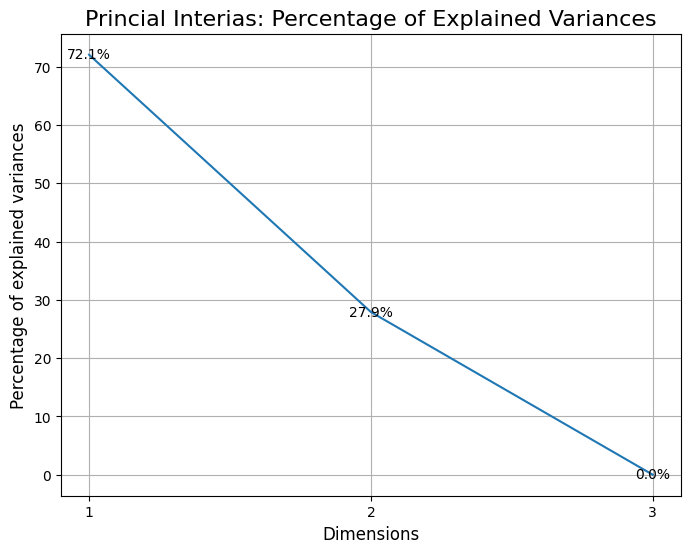

In [58]:
variances = principal_inertias
percent_explnd_var = (variances / variances.sum()) * 100

plt.figure(figsize=(8, 6))
# plot line chart along 1,2,3,4 on x_axis, variances on y_asix
plt.plot(np.arange(1, len(percent_explnd_var)+1), percent_explnd_var)
plt.title('Princial Interias: Percentage of Explained Variances', fontsize=16)
plt.xlabel('Dimensions',fontsize=12)
n_dim=len(variances)
dimensions_labels=[f'{i+1}' for i in range(len(variances))]
plt.xticks(np.arange(1,n_dim+1),dimensions_labels)  #show 1,2,3,4,5 on x_axis as ticks
plt.ylabel('Percentage of explained variances',fontsize=12)
# extract variances from percent_explnd_var and apply the percentage, %, format.
var_text = ['{:.1f}%'.format(pers) for pers in percent_explnd_var[:5]]
for i, txt in enumerate(var_text):
    plt.annotate(txt, (i+1, percent_explnd_var[i]),
                horizontalalignment='center',
                verticalalignment='center')
plt.grid()
plt.show()

In [42]:
# make 1D array of singular values into a 2D array, a diagnal matrix with all λs
D_lamb_mat = np.diag(D_lamb)
print("Diagnal matrix of λ:\n", D_lamb_mat)

Diagnal matrix of λ:
 [[5.31462853e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.30778176e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.85917067e-17]]


In [43]:
princpl_coords_row = Dr_sqrt_inv @ U @  D_lamb_mat # principal coordinates of row variables
print("princpl_coords_row\n",princpl_coords_row )

princpl_coords_row
 [[-7.68607162e-02  2.03745770e-02  9.85917067e-17]
 [ 6.13148932e-03 -4.47413023e-02  9.85917067e-17]
 [ 5.54996764e-02  2.74011453e-02  9.85917067e-17]]


In [44]:
princpl_coords_col = Dc_sqrt_inv @ V_T.T @ D_lamb_mat.T # principal coordinates of col variables
print("princpl_coords_column\n",princpl_coords_col)

princpl_coords_column
 [[-3.67940048e-02  5.12728085e-03 -1.82737803e-16]
 [-4.34454025e-02 -4.40782677e-02 -3.39587804e-17]
 [-3.96003391e-02  1.73844491e-02 -5.99518648e-17]
 [ 2.81937879e-02  4.65198152e-02 -4.60420659e-17]
 [ 9.53746641e-02 -2.88782758e-02 -1.00616224e-16]]


In [45]:
n_components=2
princpl_coords_row_n = princpl_coords_row[:, :n_components] # extract the first two columns
princpl_coords_col_n = princpl_coords_col[:, :n_components] # extract the first two columns
print('coord_row\n', princpl_coords_row_n)
print('coord_col\n', princpl_coords_col_n)

coord_row
 [[-0.07686072  0.02037458]
 [ 0.00613149 -0.0447413 ]
 [ 0.05549968  0.02740115]]
coord_col
 [[-0.036794    0.00512728]
 [-0.0434454  -0.04407827]
 [-0.03960034  0.01738445]
 [ 0.02819379  0.04651982]
 [ 0.09537466 -0.02887828]]


In [46]:
# get_princpl_coords_df
inds = ['Dim {}'.format(i) for i in range(n_components)]  # create two dimension names:'Dim 0' and 'Dim 1'
#create row_pcs_df and col_pcs_df from the extract coord_row and coord_col
# with columns=Dim0 and Dim1 and row indice=rows & columns in the original frequency table.
row_pcs_df = pd.DataFrame(data=princpl_coords_row_n, columns=inds, index=row_categories)
col_pcs_df = pd.DataFrame(data=princpl_coords_col_n, columns=inds, index=col_categories)
print('row pcs_df\n',row_pcs_df)
print('\ncol pcs_df\n',col_pcs_df)

row pcs_df
                        Dim 0     Dim 1
site                                  
Game geners        -0.076861  0.020375
Character modeling  0.006131 -0.044741
Play Mode           0.055500  0.027401

col pcs_df
                         Dim 0     Dim 1
Genshin             -0.036794  0.005127
Love and Deep Space -0.043445 -0.044078
Light and Night     -0.039600  0.017384
Honkai: Star Rail    0.028194  0.046520
Love and Producer    0.095375 -0.028878


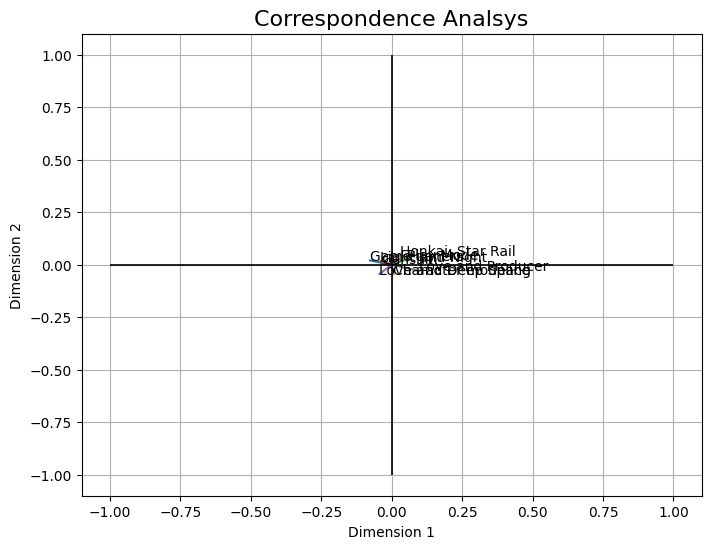

In [47]:
plt.figure(figsize=(8, 6))
for i, txt in enumerate(list(row_categories)):
    plt.plot([0,row_pcs_df.iloc[i]['Dim 0']],[0,row_pcs_df.iloc[i]['Dim 1']])   #each line starts from original (0,0)
    plt.annotate(txt, (row_pcs_df.iloc[i]['Dim 0'], row_pcs_df.iloc[i]['Dim 1']))# attach the point at the coordinate(dim0, dim1)
for i, txt in enumerate(list(col_categories)):
    plt.plot([0,col_pcs_df.iloc[i]['Dim 0']],[0,col_pcs_df.iloc[i]['Dim 1']])
    plt.annotate(txt, (col_pcs_df.iloc[i]['Dim 0'], col_pcs_df.iloc[i]['Dim 1']))
plt.title('Correspondence Analsys',fontsize=16)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.vlines(0,-1,1,linewidth=1.2, color='k') # plot the y-axis
plt.hlines(0,-1,1,linewidth=1.2, color='k' )# plot the x-axis
plt.grid()
plt.show()